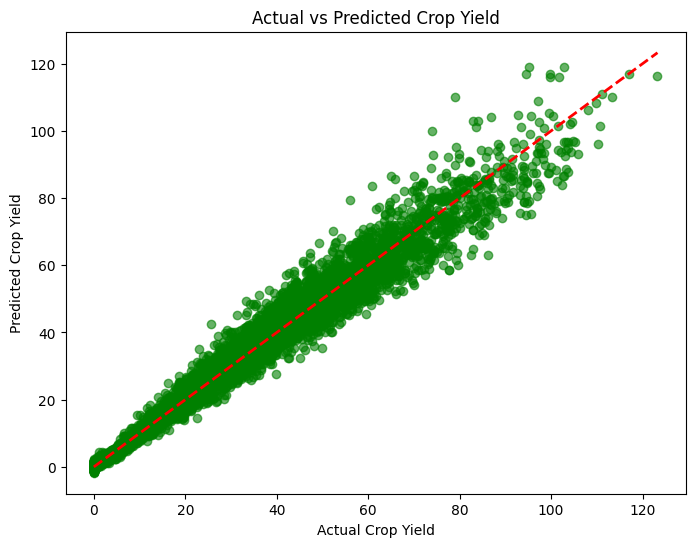


Feature Importance:
             Feature  Importance
0        Temperature    0.354040
1           Humidity    0.173659
5  Crop_Type_encoded    0.154511
2       Soil_Quality    0.144309
3          NPK_Ratio    0.089438
4    Fertility_Index    0.084043


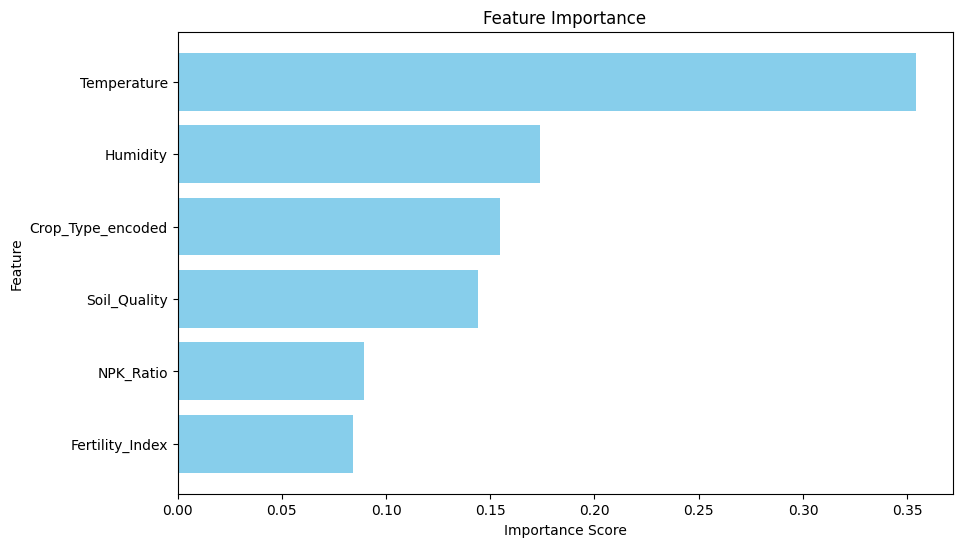

✅ Predictions saved to model/predictions.csv


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Predict using the loaded model
y_pred = best_model.predict(X_test)

# 2️⃣ Actual vs Predicted Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.show()

# 3️⃣ Feature Importance (if tree-based model)
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    feat_imp = pd.DataFrame({
        "Feature": X.columns,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    print("\nFeature Importance:")
    print(feat_imp)

    plt.figure(figsize=(10,6))
    plt.barh(feat_imp["Feature"], feat_imp["Importance"], color="skyblue")
    plt.gca().invert_yaxis()  # highest importance on top
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.title("Feature Importance")
    plt.show()

# 4️⃣ Save predictions to CSV
results = X_test.copy()
results['Actual_Yield'] = y_test
results['Predicted_Yield'] = y_pred
results.to_csv("model/predictions.csv", index=False)
print("✅ Predictions saved to model/predictions.csv")
